<h1>Part 1 - Machine learning</h1>

<h2>Task 1.1 – Data preparation</h2>

The data set shows the refractive indices and the relative chemical abundances of samples from different glass objects. 

The samples are from: float processed building windows, float processed vehicle windows, non-float processed building windows, non-float processed vehicle windows, containers, tableware and headlamps. Although seven different classes exist, the samples are only from six of these classes; there are no samples of class number four in the dataset.

The data were normalised using the Standard Scaler from sklearn. Firstly, the data were loaded using pandas. After this, the data were split into separate columns. This was done because the original data frame contained only one column for each record, so normalising the data in this format would have resulted in a single value for each record. Next, the data were put into a numpy array which allowed it to be sliced, and the array was converted from string to floating point data type. The eleventh column of the dataset was the type of glass. This means that the eleventh column could be used to train the data as the targets. The first column was the identification number of the sample, so this was removed. This enabled the data to be normalised.

In [114]:
# TASK 1.1 - Data preparation
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Stop showing loads of warnings about updates etc
warnings.simplefilter('ignore')

# load the data
data = pd.read_table("glass.data")
names = pd.read_table("glass.names")
tags = pd.read_table("glass.tag")

# Check that the set is the correct size and type
print(data.shape)
print(type(data))

# Split the data into columns
dataSplit = data['id,refractive index,Sodium oxide,magnesium oxide,aluminum oxide,silcon oxide,potassium oxide,calcium oxide,barium oxide,iron oxide,type'].str.split(',', expand=True)

# Make sure it's a numpy array and turn it into numbers
dataArray = np.array(dataSplit)
dataArray = dataArray.astype(np.float)

# Split the array into targets and inputs. Remove ID.
inputs = dataArray[:,1:10]
targets = dataArray[:,-1]

# Normalise the data
scaler = StandardScaler()
inputsNormal = scaler.fit_transform(inputs)

# Check everything! Commented out most of the time but handy for quick access
#print(tags, names, data)
#print(inputs.shape)
#print(dataArray)
#print(targets)
#print(inputs)
#print(inputsNormal)

(214, 1)
<class 'pandas.core.frame.DataFrame'>


<h2>Task 1.2 – Classification</h2>

The normalised dataset was used to train random forest, neural network and support vector machine (SVM) classifiers.

Firstly, the data were split into a training part and a testing part, randomly allocating half the data set to each part. This was done because testing the classifiers with the same data used to train them would be less likely to give meaningful results. The problem with the chosen method was the size of the data set, with only 214 samples. Training the classifiers with more samples would lead to more accurate predictions. This is a reason why the processes should be repeated many times, as each run yields different results.

The random forest, neural network and support vector classifiers were trained and tested using the normalised, allocated data. Two different support vector classifiers were used: a linear support vector classifier and a radial basis (RBF) support vector classifier. The test input data were projected to two dimensions using principal component analysis (PCA). This was done to enable visualisation on a scatter graph. 

The predicted classes for a sample of 10 inputs using the classification implementations were recorded. The number of correct classifications is shown here.

Random forest: 9/10<br/>
Neural network: 10/10<br/>
Linear SVM: 5/10<br/>
RBF SVM: 9/10

known 2.0
random forest 2.0
neural network 2.0
linear support vector 1.0
radial basis support vector 2.0


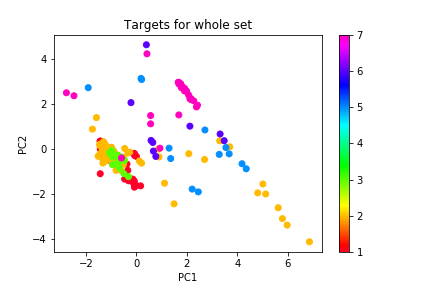

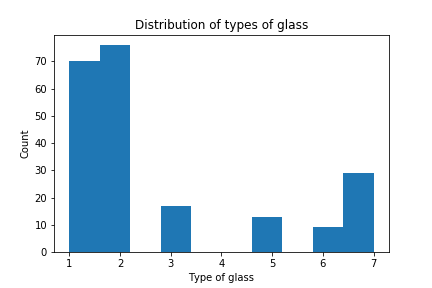

In [124]:
# TASK 1.2 - Classification

# Imports for classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# Import for making training models
from sklearn.model_selection import train_test_split
# Import for displaying graphs
import matplotlib.pyplot as plt
import sklearn.decomposition

# Split the data into a training part and a testing part
inputsTrain, inputsTest, targetsTrain, targetsTest = \
    train_test_split(inputsNormal, targets, train_size=0.8)

# Create and use the random forest classifier
randomForest = RandomForestClassifier()
randomForest.fit(inputsTrain, targetsTrain)
classedByRF = randomForest.predict(inputsTest)

# Create and use the neural network classifier
neuralNetwork = MLPClassifier()
neuralNetwork.fit(inputsTrain, targetsTrain)
classedByNN = neuralNetwork.predict(inputsTest)

# Create and use a linear support vector classifier
SVlinear = SVC(kernel="linear")
SVlinear.fit(inputsTrain, targetsTrain)
classedBySVlinear = SVlinear.predict(inputsTest)

# Create and use a radial-basis support vector classifier
SVcurved = SVC(gamma="auto")
SVcurved.fit(inputsTrain, targetsTrain)
classedBySVrbf = SVcurved.predict(inputsTest)

# Put things into lists for easy access later
classifierNames = ['random forest', 'neural network', 'linear support vector', 'radial basis support vector']
classifierList = [randomForest, neuralNetwork, SVlinear, SVcurved]
classedList = [classedByRF, classedByNN, classedBySVlinear, classedBySVrbf]

# Use PCA to reduce the number of dimensions to 2 for visualisation
pca = sklearn.decomposition.PCA(n_components=2)
compressedInputs = pca.fit_transform(inputs)
compressedInputsTest = pca.fit_transform(inputsTest)

# Look at some individual results
print("known", targetsTest[0])
for i in range(4):
    print(classifierNames[i], classedList[i][0])

# Plot target points for whole set
plt.figure()
graphTargets = plt.scatter(compressedInputs[:,0], compressedInputs[:,1], 
                                c=targets, cmap="gist_rainbow")
plt.title("Targets for whole set")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(graphTargets)
plt.show() 

# Have a look at the spread
plt.figure()
plt.hist(targets, histtype='bar')
plt.title("Distribution of types of glass")
plt.xlabel("Type of glass") 
plt.ylabel("Count")
plt.show()

# Checks to make sure everything is right 
#print("Testing targets: ", targetsTest)
#print(compressedInputs)

<h2>Task 1.3 – Assessment of classification</h2>

The lack of data was especially problematic for this dataset because classes one and two were approximately three times more numerous than each of the other classes. Class six was the rarest, with only nine samples in the entire dataset. There were cases in which splitting the data into random halves led to only three samples of class six being allocated to train the classifiers. This difference between classes is illustrated using confusion matrices.

The size of the training data was altered so that 90 % of the data were used to train the classifiers, with the remaining 10 % used for testing. A problem with this was the lack of testing data. There was a case where this led to no samples of class six being tested. Although the abundance of training data appeared to produce better results at a glance, the lack of testing data meant that classes one and two were the only class predictions thoroughly tested, and sometimes one of the classes was not tested at all. A solution to this would be to allocate a certain percentage of each known class to training, rather than selecting samples randomly throughout the dataset. This problem demonstrates why cross-validation was used for this dataset. Cross-validation is a useful technique for small sample sizes because the process splits the data into several different random training and testing parts and returns results based on all these different groups.

Precision is a measure of the relevance of results, calculated from the true positive and false positive rates. Recall is a measure of the number of relevant results, and the F measure is the harmonic mean of the precision and recall. According to Brownlee (2014) the F measure can be more informative than the precision or accuracy alone because it shows how correct a result is, rather than just whether or not it is correct.  

The weighted average precision rates and F scores of the classification implementations were recorded for ten iterations of the whole process, using 80 % of the data for training and 20 % for testing, randomly selected in each iteration. This resulted in these average scores:

Random forest precision: 0.77<br/>
Random forest F-measure: 0.80<br/>
Neural network precision: 0.66<br/>
Neural network F-measure: 0.70<br/>
Linear SVM precision: 0.61<br/>
Linear SVM F-measure: 0.62<br/>
RBF SVM precision: 0.66<br/>
RBF SVM F-measure: 0.64

Cross-validation was used to improve on the analysis of each classifier’s effectiveness. The cross-validation process provides more meaningful results than the analysis methods used previously in this assignment because it performs more tests, using different random samples each time. The number of folds was specified as six because, according to Hastie et. al. (2013), it is preferable to have an equal number of samples in each group, and according to Brownlee (2018), five to ten folds tend to be balanced between bias and variance, smaller datasets usually requiring a smaller number of folds to represent the dataset.  

<h3>Plots</h3>

Box plots were produced from the cross-validation results. The plots show the training scores as a comparison to the test scores. The training scores should be around one, with a small range, because they have the correct classifications. The training scores can therefore be used to select the number of folds as they can indicate the tendency to bias or variance. Generally, using a smaller number of folds produced scores with smaller ranges but lower means, and using a larger number produced scores with larger ranges but higher means.

The box plots show that the linear SVM resulted in the smallest interquartile range, meaning that results from this classifier varied less than those of the other classifiers, although it performed worst overall, as its scores were the lowest. The random forest performed the best overall, with the highest mean, although its range extended down to 0.5, which means that there may be times when the neural network and RBF SVM perform better than the random forest. 

Scatter plots were produced using PCA to compress the data into two dimensions and show the predicted classes from each classification implementation. The axes have no units because the principal components are derived from the relative chemical abundances, which are represented as percentages, and the refractive indices which are unitless. 

<h3>Conclusion</h3>

The conclusion was that the random forest classifier was the best implementation for classifying types of glass. This was because the average F-measures of the random forest classifications were highest, and the cross-validation results supported this.    

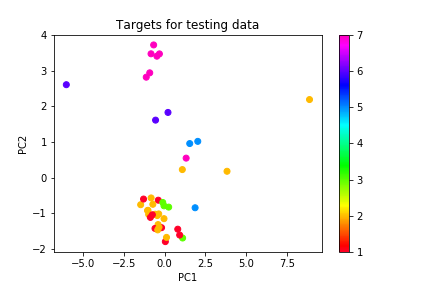

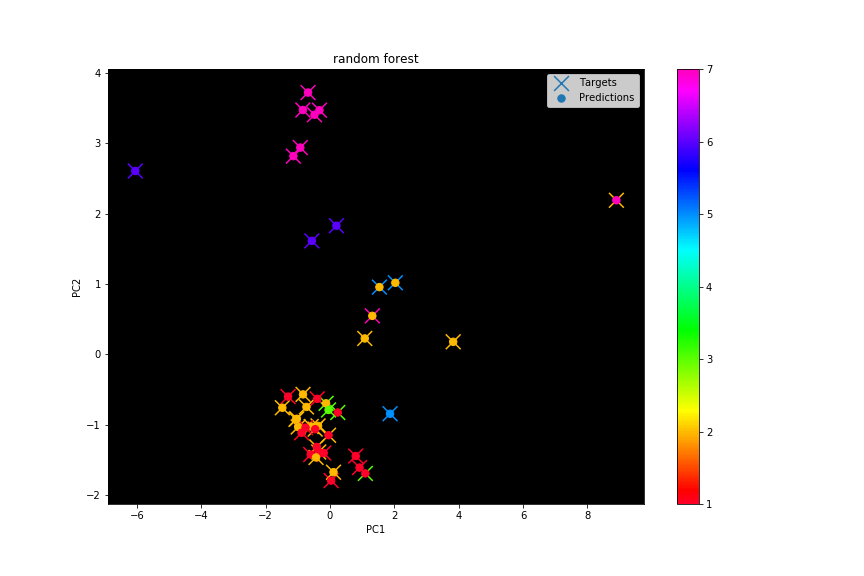

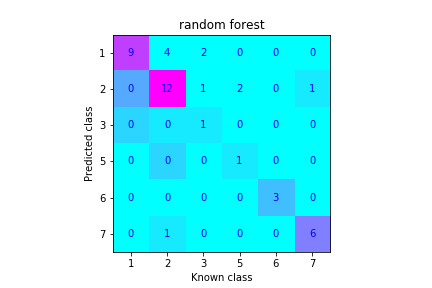

random forest cross validation


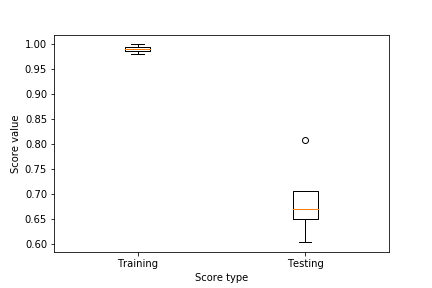

Precision, recall & f measure for random forest
(0.7941860465116278, 0.7441860465116279, 0.7258985200845666, None)
Mean absolute error for random forest 0.5813953488372093


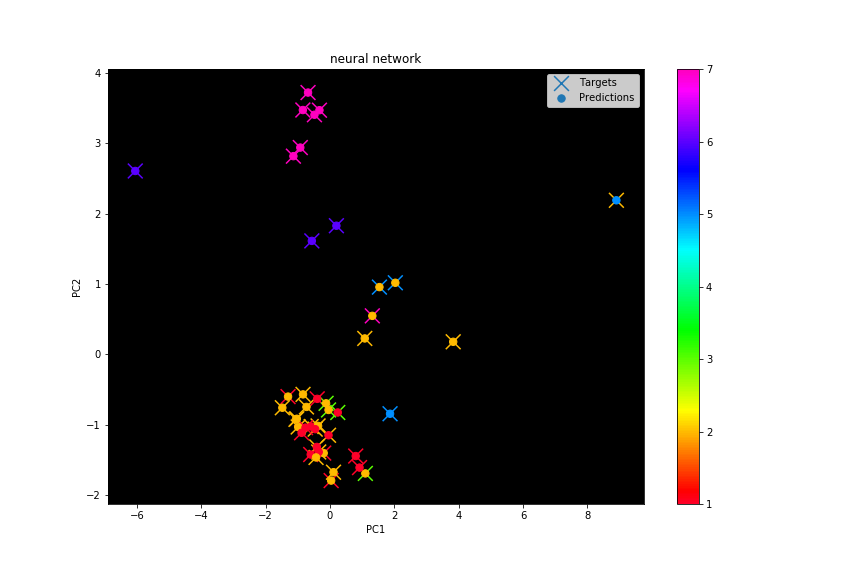

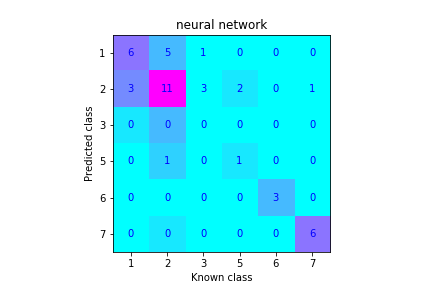

neural network cross validation


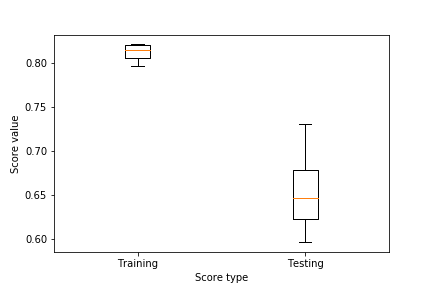

Precision, recall & f measure for neural network
(0.7941860465116278, 0.7441860465116279, 0.7258985200845666, None)
Mean absolute error for neural network 0.627906976744186


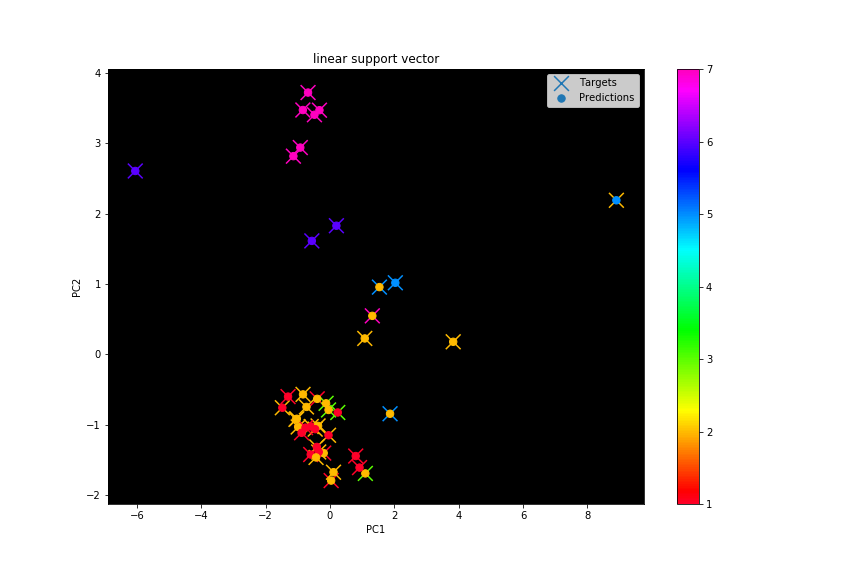

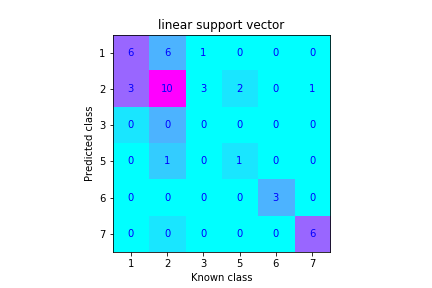

linear support vector cross validation


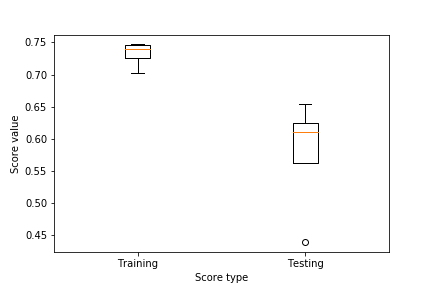

Precision, recall & f measure for linear support vector
(0.7941860465116278, 0.7441860465116279, 0.7258985200845666, None)
Mean absolute error for linear support vector 0.6511627906976745


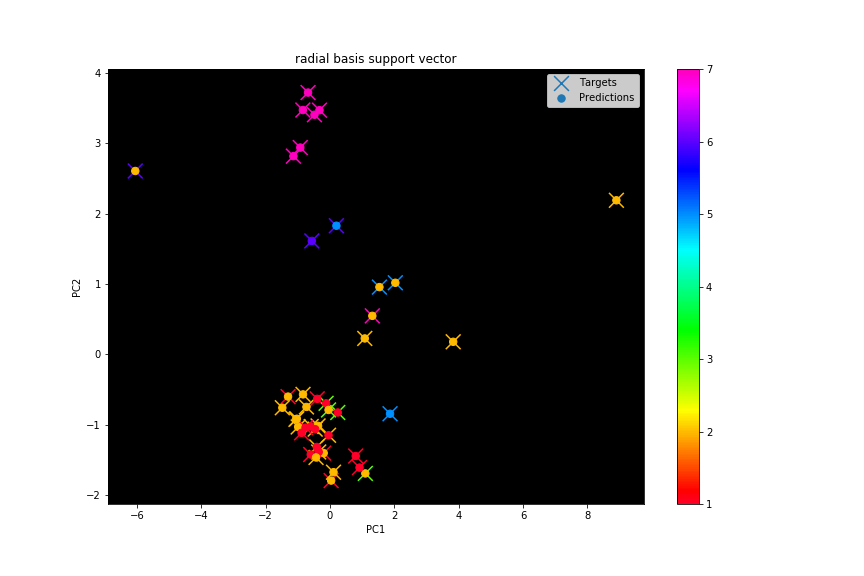

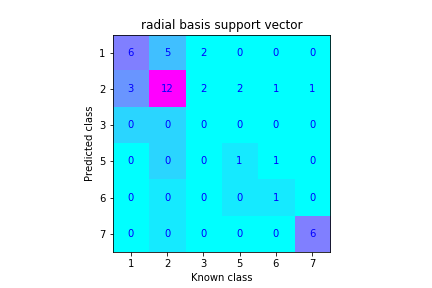

radial basis support vector cross validation


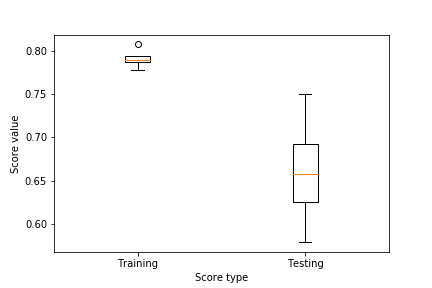

Precision, recall & f measure for radial basis support vector
(0.7941860465116278, 0.7441860465116279, 0.7258985200845666, None)
Mean absolute error for radial basis support vector 0.6976744186046512


In [123]:
# TASK 1.3 - Assessment of classification
# Although there's a lot of repeated code here I decided not to put it all into a loop
# because it's easier to select and change different parts by keeping it separate.
# Put it all into functions at the end.

import matplotlib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.model_selection import cross_validate

def plotPredictions(pointsToPlot, name):
    # Make it easy to see which points are correct and which aren't
    fig = plt.figure(figsize=(12,8))
    graph = fig.add_subplot(111)
    plot = graph.scatter(compressedInputsTest[:,0], compressedInputsTest[:,1], c=targetsTest, 
                  marker="x", s=220, label="Targets", cmap="gist_rainbow")
    graph.scatter(compressedInputsTest[:,0], compressedInputsTest[:,1], c=pointsToPlot, 
                  marker=".", s=220, label="Predictions", cmap="gist_rainbow")
    graph.set_facecolor('#000000')
    plt.title(name)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(loc='upper right');
    plt.colorbar(plot)
    
def crossValidate(classifier, name):
    validated = cross_validate(classifier, inputsNormal, targets, cv=4)
    print(name, "cross validation")
    training = validated["train_score"]
    testing = validated["test_score"]
    plt.boxplot([training, testing])
    plt.xticks([1,2], ["Training", "Testing"])
    plt.xlabel("Score type")
    plt.ylabel("Score value")
    plt.show()
    
def plotMatrix(classifier, name):
    # Axes
    classes=['0', '1', '2', '3', '5', '6', '7']
    
    matrix = confusion_matrix(targetsTest, classifier)
    fig, con = plt.subplots()
    con.set_title(name)
    con.imshow(matrix, cmap="cool")
    con.set_xticklabels(classes)
    con.set_yticklabels(classes)
    con.set_xlabel("Known class")
    con.set_ylabel("Predicted class")
    for i in range(len(matrix[0,:])):
        for j in range(len(matrix[:,0])):
            text = con.text(i, j, matrix[i, j], ha="center", va="center", color="b")
    plt.show()

    
# Plot target points for tested half of set
plt.figure()
graphTargetsHalf = plt.scatter(compressedInputsTest[:,0], compressedInputsTest[:,1], 
                                c=targetsTest, cmap="gist_rainbow")
plt.title("Targets for testing data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(graphTargetsHalf)

for i in range(4):
    # Plot the predictions
    plotPredictions(classedList[i], classifierNames[i])
    # Confusion matrices 
    plotMatrix(classedList[i], classifierNames[i])
    # Cross-validation & box plots
    crossValidate(classifierList[i], classifierNames[i])
    # TP-FP rates etc
    print("Precision, recall & f measure for", classifierNames[i])
    print(precision_recall_fscore_support(targetsTest, classedByRF, average='weighted'))
    # Mean absolute errors
    print("Mean absolute error for", classifierNames[i], np.mean(abs(classedList[i]-targetsTest)))

<h1>Part 2 - Evolutionary Computation</h1>

<h2>Task 2.1 – Generation of random solutions</h2>

500 random solutions to each problem were generated.

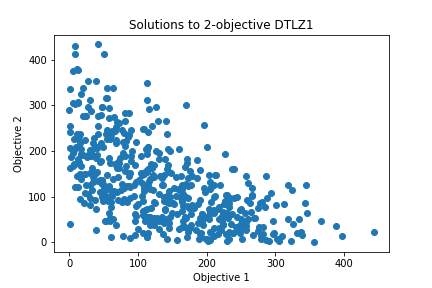

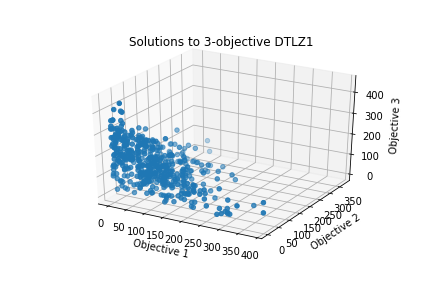

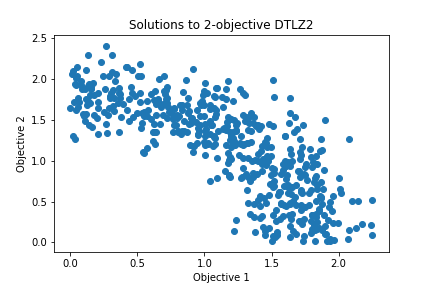

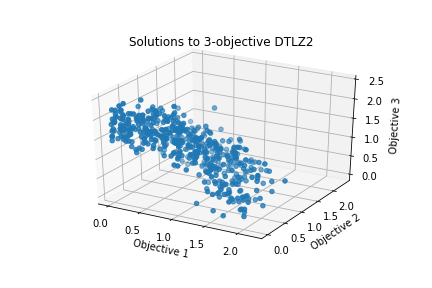

In [110]:
# Task 2.1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fix a bug which makes 3d plots appear tiny
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

def plot2Solutions(whichProblem, problemOutputs):    
    plt.figure() 
    plt.scatter(problemOutputs[:,0], problemOutputs[:,1])
    plt.title("Solutions to 2-objective DTLZ" + str(whichProblem))
    # Label the axes
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.show()

def plot3Solutions(whichProblem, problemOutputs): 
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(problemOutputs[:,0], problemOutputs[:,1], problemOutputs[:,2])
    ax.set_title("Solutions to 3-objective DTLZ" + str(whichProblem))
    # Label the axes
    ax.set_xlabel("Objective 1")
    ax.set_ylabel("Objective 2")
    ax.set_zlabel("Objective 3")
    plt.show()
    
def dtlz1(x, M):
    """
    An implementation of the DTLZ1 test problem. M is the number of objectives (2 by default, override for 3).
    """
    z = x[M-1:] - 0.5
    
    gp1 = 100 * (x[M-1:].shape[0] + np.dot(z, z) - np.cos(20 * np.pi * z).sum()) + 1
    f = np.array([gp1] * M)
   
    f[0] *= 0.5 * np.prod(x[0:M-1])  
    for i in range(1, M-1):
        f[i] *= 0.5 * np.prod(x[0:M-i-1]) * (1 - x[M-i-1])
    f[M-1] *= 0.5 * (1 - x[0])
    
    return f


def dtlz2(x, M):
    """
    An implementation of the DTLZ2 test problem. M is the number of objectives (2 by default, override for 3).
    """
    gp1 = ((x[M-1:] - 0.5)**2).sum() + 1
    f = np.array([gp1] * M)

    for i in range(M):
        if M-i-1 > 0:
            for j in range(M-i-1):
                f[i] *= np.cos((np.pi * x[j]) / 2)

        if i > 0:
            f[i] *= np.sin((np.pi * x[M-i-1]) / 2)

    return f


numSolutions = 500
# Between 0 and 1
# Solutions to 2-objective DTLZ1 (6 decision vars)
random6 = np.random.rand(numSolutions, 6)
problemOutputs6 = np.array([dtlz1(value, 2) for value in random6])
plot2Solutions(1, problemOutputs6)

# Solutions to 3-objective DTLZ1 (7 decision vars)
random7 = np.random.rand(numSolutions, 7)
problemOutputs7 = np.array([dtlz1(value, 3) for value in random7])
plot3Solutions(1, problemOutputs7)

# Solutions to 2-objective DTLZ2 (11 decision vars)
random11 = np.random.rand(numSolutions, 11)
problemOutputs11 = np.array([dtlz2(value, 2) for value in random11])
plot2Solutions(2, problemOutputs11)

# Solutions to 3-objective DTLZ2 (12 decision vars)
random12 = np.random.rand(numSolutions, 12)
problemOutputs12 = np.array([dtlz2(value, 3) for value in random12])
plot3Solutions(2, problemOutputs12)



def printPoem1():
    print("Please wait while this cell executes...")
    print("Here's a poem to keep you happy while you wait.")
    print("\nAint two five two")
    print("Is the best module")
    print("Peas are great too")
    print("Becuase they have nodules")

def printPoem2():
    print("Please wait while this cell executes...")
    print("Here's a poem to keep you happy while you wait.")
    print("\nGraphs are cool!")
    print("They show you stuff")
    print("Axes rule!")
    print("Plotting them is tough")

def printPoem3():
    print("Please wait while this cell executes...")
    print("Here's a poem to keep you happy while you wait.")
    print("\nEvolutionary algorithms")
    print("Nothing rhymes with that")
    print("But evolutionary algorithms")
    print("are sweeter than my cat")
    
    
def printPoem4():
    print("Please wait while this cell executes...")
    print("Here's a poem to keep you happy while you wait.")
    print("\nEAs are so lovely")
    print("They're so underrated")
    print("They're heavenly and dovely")
    print("That's a word I created")
    
def printPoem5():
    print("Please wait while this cell executes...")
    print("Here's a poem to keep you happy while you wait.")
    print("\nRoses are red")
    print("Violets are blue")
    print("Students look dead")
    print("When coursework is due")

<h2>Task 2.2 - Algorithm implementation</h2>	

The ES uses real representation for the search space. The problems are continuous and this means the Gaussian mutation is required.

After looking at the DTLZ1 function and using some trial and error we can generate the idea pareto front like this one below. The input arrays can be used as a reference when creating the algorithms.

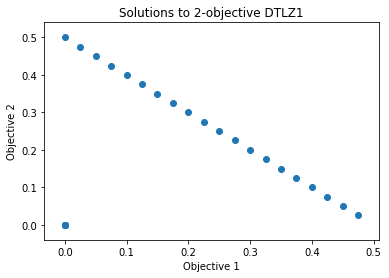

In [10]:
# Ideal pareto front for 2 objective DTLZ1 
testArchive = np.zeros((5, 2)) 

testArray=np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5])
testPoint = dtlz1(testArray, 2)
testArchive[0]=(testPoint[0], testPoint[1])
i=0.05
while i < 1:
    testArray[0]=i
    testPoint = dtlz1(testArray, 2)
    testArchive = np.append(testArchive, [[testPoint[0], testPoint[1]]], axis=0)
    i = i + 0.05

plot2Solutions(1, testArchive)

The result after mutation needs to be restricted to fall within the range zero to one, as mutating the numbers can push them outside this range. Putting values less than zero or greater than one into the DTLZ functions meant that the output graph was a straight line of the approximate shape y = -x but the range on the axes were large and often negative. Three methods were tested to keep each solution within the range. The first was to use a min-max scaler on any of the values that lay outside the accepted range. The second method was to use a while loop and keep generating values until they all lay within the required range. Although the while loop made the function take longer to finish executing, the results were better overall from this method because the min max scaler tended to convert too many values to either zero or one. The third method was to use numpy.clip to set any outlying values to 0 or 1. This was the best solution because it was faster than a loop, and created fewer changes than the scaler.<br/><br/>
Two methods were tested for the generation of the additive Gaussian distribution, numpy.random.normal and scipy.stats.truncnorm. The normal function tended to generate decision variables which led to a concave line, whereas the truncnorm function tended to generate a line of the desired overall shape but with disconnected, evenly distributed clusters of concave points. Because of this, the crowding distance was computed and similar points were discarded. This added more time to the execution of the function so was later removed.<br/><br/>
Two methods were tested for the size of the additive Gaussian distribution, none and six. It was decided that if using numpy.clip then it wouldn’t be appropriate to use a size of None because some decision variables could be created which were all 0 or 1.<br/><br/>
Two methods were tested for the generation of the initial six decision variables, named the ‘ancestor’ because it is the parent of all others. The first method was numpy.rand.random, which generates any six numbers from 0 to 1 uniformly. The second method was to generate a number in the normal distribution as with the mutations, close to 0.5. It was decided that although the second method generated a solution closer to the optimal pareto front, to use it would be cheating because the algorithm should be tested with a random number.<br/><br/>
One recurring problem with the algorithm was that it often got trapped in a state where it kept mutating but couldn’t find a dominant solution. To combat this problem the parent was moved back a step to its grandparent if the grandparent dominated it, or to the last solution that dominated all others. These techniques didn’t fully solve the problem, though. An implementation was made so that after ten thousand attempts an entirely new solution was generated to introduce greater diversity. This often caused disconnected lines on the graph which were basically separate pareto fronts. Another idea was tested, which was to only allow solutions which generated values within a certain range, and without favouring one objective more than 5 times more than the other. The problem with this was that the execution time was too long, and the function often became stuck in a seemingly infinite loop. Another idea was to use different standard deviations for the mutations, for example, to use a larger SD when further from the optimal solution, or to use a larger SD on the first element of the array and a smaller SD on the other elements. This approach was discarded because it generated a couple of highly dominant solutions which dominated all others, causing the function to either run forever or generate very few points. Eventually a compromise was made between execution time and pareto front without over-complicating the code.<br/><br/>
The standard deviation was set at 0.25 after trail and error, the first priority being the range of points, the second being the number of points and the third being the shape of the distribution.

Please wait while this cell executes...
Here's a poem to keep you happy while you wait.

Aint two five two
Is the best module
Peas are great too
Becuase they have nodules


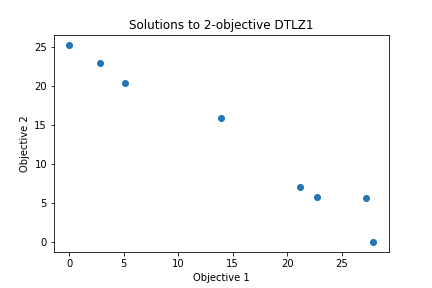

(8, 2)


In [112]:
from numpy.random import normal

# This cell takes up to 15 seconds to execute. 

def gaussMutation(xp, numValues):
# Mean needs to be 0 so the mutation can increase or decrease.
    # Add a number in the normal distruibution.
    xpPrime = xp + normal(0, 0.25, numValues)  
    # Make sure that we don't return values outside the range 0 to 1.
    return np.clip(xpPrime, 0, 1)


def dominates(A, B):  
# Return false unless the first dominates the second. 
    return (A <= B).all() and (A < B).any()


def moreSolutions(parent, archive, numVars, dims, whichProblem): 
    # Start off with a solution to compare with.
    childSolution = whichProblem(parent, dims) 
    # Repeat the process many times. A better pareto front can be generated by increasing the number 
    # of repetitions but it takes a lot of extra time to get a big improvement.
    for i in range(100000): 
        child = gaussMutation(parent, numVars)
        # Store the old solution to use in selection.
        parentSolution = childSolution    
        # Get the result of the DTLZ function.
        childSolution = whichProblem(child, dims) 
        
        # Selection - choose which decicion vars to keep. Skip the rest if this child is no good.
        if dominates(childSolution, parentSolution):
            # Keep track of the place in the archive.
            index=0
            notDominated = True

            # Compare with everything in the archive.
            for eachSolution in archive:
                if(dominates(eachSolution, childSolution)):
                    # Old dominates new. Discard this one and move on.
                    notDominated = False
                    break
                elif(dominates(childSolution, eachSolution)):
                    # New dominates old. Delete old.
                    archive = np.delete(archive, index, axis=0)
                    index=index-1
                index=index+1

            # If this solution wasn't dominated at all add it to the archive.    
            if(notDominated):
                if(dims==2):
                    archive = np.append(archive, [[childSolution[0], childSolution[1]]], axis=0)
                else:
                    archive = np.append(archive, [[childSolution[0], childSolution[1], childSolution[2]]], axis=0)
            parent = child
        
    return archive 
    

printPoem1()

# Create the archive.
archive=np.zeros((1, 2))      
# Start with one random solution.
ancestor = np.random.rand(6)
# Get x and y co-ordinates.
problemOutput = dtlz1(ancestor, 2)
# Make this our first reference position in the archive.
archive[0] = problemOutput[0], problemOutput[1]

# Iterate through mutations and archive.
archive = moreSolutions(ancestor, archive, 6, 2, dtlz1)

# Plot the results
plot2Solutions(1, archive)
print(archive.shape)

<h2>Task 2.4 - Visulisation of results</h2>
<h3>Part 1 - 2 objective DTLZ1</h3>

Please wait while this cell executes...
Here's a poem to keep you happy while you wait.

Graphs are cool!
They show you stuff
Axes rule!
Plotting them is tough


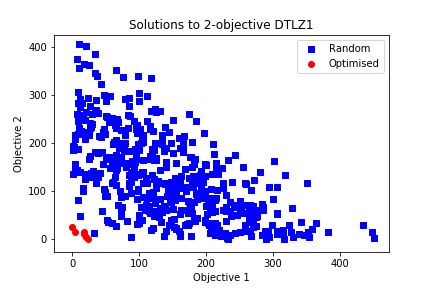

In [99]:
# Part 1 - 2 objective DTLZ1

printPoem2()

# Generate the randoms
random6 = np.random.rand(numSolutions, 6)
problemOutputs6 = np.array([dtlz1(value, 2) for value in random6])

# Create the archive
archive=np.zeros((1, 2))      
# 6 decision vars
ancestor = np.random.rand(6)
# Get x and y co-ordinates for this solution
problemOutput = dtlz1(ancestor, 2)
# Make this our first reference position in the archive
archive[0] = problemOutput[0], problemOutput[1]

ancestor = np.random.rand(6)
#Repeat process
archive = moreSolutions(ancestor, archive, 6, 2, dtlz1)

# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(problemOutputs6[:,0], problemOutputs6[:,1], c='b', marker="s", label='Random')
ax1.scatter(archive[:,0], archive[:,1], c='r', marker="o", label='Optimised')
plt.legend(loc='upper right');

plt.title("Solutions to 2-objective DTLZ1")
# Label the axes
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

<h3>Part 2 - 3 objective DTLZ1</h3>

Please wait while this cell executes...
Here's a poem to keep you happy while you wait.

Evolutionary algorithms
Nothing rhymes with that
But evolutionary algorithms
are sweeter than my cat


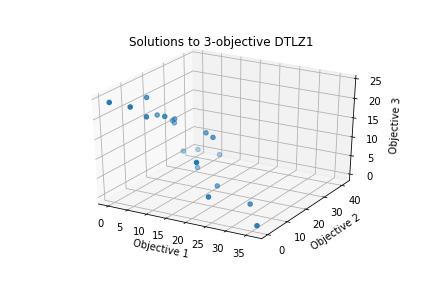

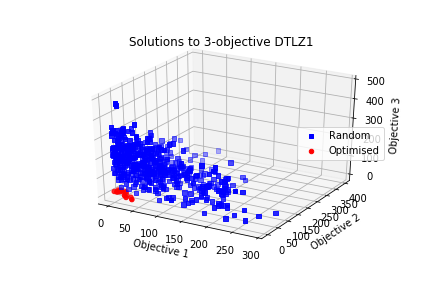

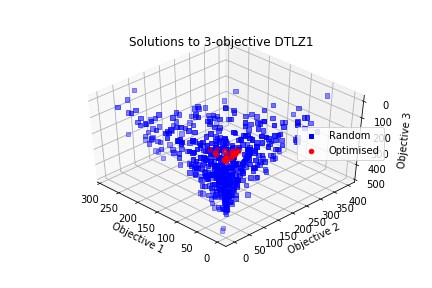

In [100]:
# Part 2 - 3 objective DTLZ1

# Plot all the results
def plotThese(angle1, angle2):
    # rotate the axes and show from another angle 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(problemOutputs7[:,0], problemOutputs7[:,1], problemOutputs7[:,2], c='b', marker="s", label='Random')
    ax.scatter(archive[:,0], archive[:,1], archive[:,2], c='r', marker="o", label='Optimised')
    plt.legend(loc='center right');
    ax.set_title("Solutions to 3-objective DTLZ1")
    # Label the axes
    ax.set_xlabel("Objective 1")
    ax.set_ylabel("Objective 2")
    ax.set_zlabel("Objective 3")
    ax.view_init(angle1, angle2)
    plt.show() 
    
printPoem3()

# Generate the randoms
random7 = np.random.rand(500, 7)
problemOutputs7 = np.array([dtlz1(value, 3) for value in random7])

# Create the archive
archive=np.zeros((1, 3))      
# 7 decision vars
ancestor = np.random.rand(7)
# Get x, y and z co-ordinates for this solution
problemOutput = dtlz1(ancestor, 3)
# Make this our first reference position in the archive
archive[0] = problemOutput[0], problemOutput[1], problemOutput[2]

ancestor = np.random.rand(7)
# Repeat process
archive = moreSolutions(ancestor, archive, 7, 3, dtlz1)

# Plot just the optimised data
plot3Solutions(1, archive)
# Plot all the results
plotThese(30, 300)
plotThese(315, 225)

<h3>Part 3 - 2 objective DTLZ2</h3>

Please wait while this cell executes...
Here's a poem to keep you happy while you wait.

EAs are so lovely
They're so underrated
They're heavenly and dovely
That's a word I created


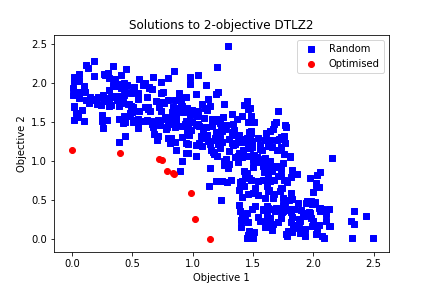

In [102]:
# Part 3 - 2 objective DTLZ2

printPoem4()

# Generate the randoms
random11 = np.random.rand(numSolutions, 11)
problemOutputs11 = np.array([dtlz2(value, 2) for value in random11])

# Create the archive
archive=np.zeros((1, 2))      
# 6 decision vars
ancestor = np.random.rand(11)
# Get x and y co-ordinates for this solution
problemOutput = dtlz2(ancestor, 2)
# Make this our first reference position in the archive
archive[0] = problemOutput[0], problemOutput[1]

ancestor = np.random.rand(11)
# Repeat process
archive = moreSolutions(ancestor, archive, 11, 2, dtlz2)

# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(problemOutputs11[:,0], problemOutputs11[:,1], c='b', marker="s", label='Random')
ax1.scatter(archive[:,0], archive[:,1], c='r', marker="o", label='Optimised')
plt.legend(loc='upper right');

plt.title("Solutions to 2-objective DTLZ2")
# Label the axes
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

<h3>Part 4 - 3 objective DTLZ2</h3>

Please wait while this cell executes...
Here's a poem to keep you happy while you wait.

Roses are red
Violets are blue
Students look dead
When coursework is due


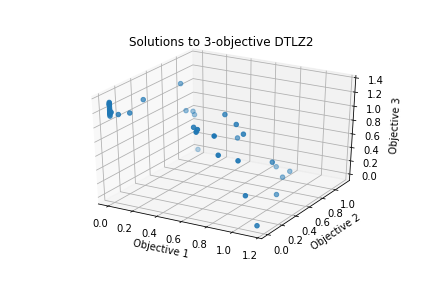

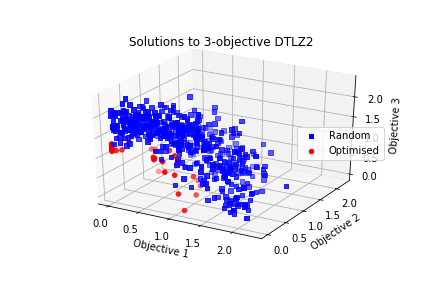

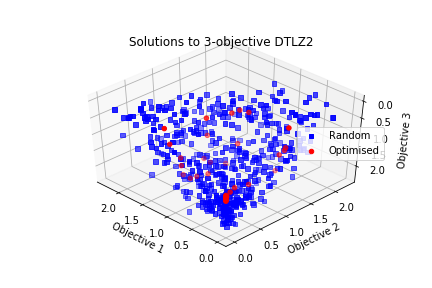

In [104]:
# Part 4 - 3 objective DTLZ2

# Plot all the results
def plotResults(angle1, angle2):
    # rotate the axes and show from another angle 
    plt.figure() 
    ax = plt.axes(projection='3d')
    ax.scatter(problemOutputs12[:,0], problemOutputs12[:,1], problemOutputs12[:,2], c='b', marker="s", label='Random')
    ax.scatter(archive[:,0], archive[:,1], archive[:,2], c='r', marker="o", label='Optimised')
    plt.legend(loc='center right');
    ax.set_title("Solutions to 3-objective DTLZ2")
    # Label the axes
    ax.set_xlabel("Objective 1")
    ax.set_ylabel("Objective 2")
    ax.set_zlabel("Objective 3")
    ax.view_init(angle1, angle2)
    plt.show() 

printPoem5()

# Generate the randoms
random12 = np.random.rand(numSolutions, 12)
problemOutputs12 = np.array([dtlz2(value, 3) for value in random12])

# Create the archive
archive=np.zeros((1, 3))      
# 7 decision vars
ancestor = np.random.rand(12)
# Get x, y and z co-ordinates for this solution
problemOutput = dtlz2(ancestor, 3)
# Make this our first reference position in the archive
archive[0] = problemOutput[0], problemOutput[1], problemOutput[2]
 
ancestor = np.random.rand(12)
# Repeat process
archive = moreSolutions(ancestor, archive, 12, 3, dtlz2)

# Plot just the optimised data
plot3Solutions(2, archive)
# Plot all the results
plotResults(30, 300)
plotResults(315, 225)  

<h2>References</h2>

Brownlee, J. (2014). Classification Accuracy is Not Enough: More Performance Measures You Can Use. Available: https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/  Last accessed 23rd March 2020.

Brownlee, J. (2018). A Gentle Introduction to k-fold Cross-Validation. Available: https://machinelearningmastery.com/k-fold-cross-validation/ Last accessed 8th April 2020.

Hastie, T., James, G., Tibshirani, R., Witten, D. (2013). An Introduction to Statistical Learning. New York: Springer. p181.